## Plot Results of Solving Ising Model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import subprocess

In [2]:
compiled_dir = f"..{os.sep}compiled"
data_dir = f"..{os.sep}data"
plot_dir = f"..{os.sep}plots"

In [3]:
def read_eigenvalues(filename):
    with open(filename) as f:
        data = f.readlines()
    return [float(ev) for ev in data[1].split()]

In [4]:
program = f"{compiled_dir}{os.sep}ising_model"

In [5]:
N = range(3, 13)
print(list(N))

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [6]:
lam = np.arange(0, 3.1, 0.1)
print(lam)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]


In [7]:
num_eig = 8

In [8]:
energy_eigenvalues = np.zeros((len(N), len(lam), num_eig))

In [9]:
for idx1, n in enumerate(N):
    print(f"Processing N = {n} ...")
    for idx2, lm in enumerate(lam):
        output_filename = f"{data_dir}{os.sep}ising_N{n}_lam{lm:.2f}.txt"
        output = subprocess.run(
            [program, "--N", str(n), "--lambda", str(lm), "--output_filename", output_filename],
            stdout=subprocess.PIPE
        )
        E = read_eigenvalues(output_filename)
        energy_eigenvalues[idx1, idx2] = E[:num_eig]

Processing N = 3 ...
Processing N = 4 ...
Processing N = 5 ...
Processing N = 6 ...
Processing N = 7 ...
Processing N = 8 ...
Processing N = 9 ...
Processing N = 10 ...
Processing N = 11 ...
Processing N = 12 ...


## Energy as a Function of Lambda

Plot energy as a function of lambda for the first four levels, for different number of particles.

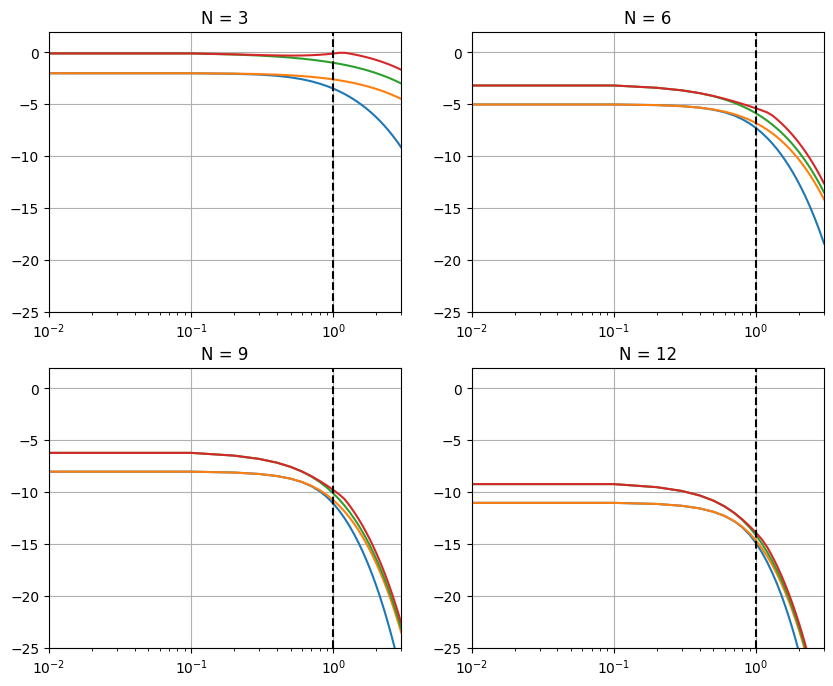

In [54]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# N = 3
ax[0, 0].plot(lam, energy_eigenvalues[0, :, 0], label="E_1")
ax[0, 0].plot(lam, energy_eigenvalues[0, :, 1], label="E_2")
ax[0, 0].plot(lam, energy_eigenvalues[0, :, 2], label="E_3")
ax[0, 0].plot(lam, energy_eigenvalues[0, :, 3], label="E_4")
ax[0, 0].plot([1, 1], [-25, 2], "k--")
ax[0, 0].set_xscale('log')
# ax[0, 0].legend()
ax[0, 0].set_title("N = 3")
ax[0, 0].set_ylim([-25, 2])
ax[0, 0].set_xlim([10e-3, 3])
ax[0, 0].grid()

# N = 6
ax[0, 1].plot(lam, energy_eigenvalues[3, :, 0], label="E_1")
ax[0, 1].plot(lam, energy_eigenvalues[3, :, 1], label="E_2")
ax[0, 1].plot(lam, energy_eigenvalues[3, :, 2], label="E_3")
ax[0, 1].plot(lam, energy_eigenvalues[3, :, 3], label="E_4")
ax[0, 1].plot([1, 1], [-25, 2], "k--")
ax[0, 1].set_xscale('log')
# ax[0, 1].legend()
ax[0, 1].set_title("N = 6")
ax[0, 1].set_ylim([-25, 2])
ax[0, 1].set_xlim([10e-3, 3])
ax[0, 1].grid()

# N = 9
ax[1, 0].plot(lam, energy_eigenvalues[6, :, 0], label="E_1")
ax[1, 0].plot(lam, energy_eigenvalues[6, :, 1], label="E_2")
ax[1, 0].plot(lam, energy_eigenvalues[6, :, 2], label="E_3")
ax[1, 0].plot(lam, energy_eigenvalues[6, :, 3], label="E_4")
ax[1, 0].plot([1, 1], [-25, 2], "k--")
ax[1, 0].set_xscale('log')
# ax[1, 0].legend()
ax[1, 0].set_title("N = 9")
ax[1, 0].set_ylim([-25, 2])
ax[1, 0].set_xlim([10e-3, 3])
ax[1, 0].grid()

# N = 12
ax[1, 1].plot(lam, energy_eigenvalues[9, :, 0], label="E_1")
ax[1, 1].plot(lam, energy_eigenvalues[9, :, 1], label="E_2")
ax[1, 1].plot(lam, energy_eigenvalues[9, :, 2], label="E_3")
ax[1, 1].plot(lam, energy_eigenvalues[9, :, 3], label="E_4")
ax[1, 1].plot([1, 1], [-25, 2], "k--")
ax[1, 1].set_xscale('log')
# ax[1, 1].legend()
ax[1, 1].set_title("N = 12")
ax[1, 1].set_ylim([-25, 2])
ax[1, 1].set_xlim([10e-3, 3])
ax[1, 1].grid()

plt.savefig(f"{plot_dir}{os.sep}energy_vs_lambda_different_N.pdf", format="pdf", bbox_inches="tight")